In [63]:
class Vektor:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        x, y = self.koordinate()
        return ('{}(x = {}, y = {})'.format(self.__class__.__name__, x, y))
    
    def __add__(self, other):
        x1 = self.x
        x2 = other.x
        y1 = self.y
        y2 = other.y
        return(Vektor(x1 + x2, y1 + y2))
    
    def __sub__(self, other):
        x1 = self.x
        x2 = other.x
        y1 = self.y
        y2 = other.y
        return(Vektor(x1 - x2, y1 - y2))
    
    def __rmul__(self, konstanta):
        x1 = konstanta * self.x
        y1 = konstanta * self.y
        return(Vektor(x1, y1))
    
    def koordinate(self):
        return self.x, self.y
    
class Premica:
    def __init__(self, u1, u2): # u tocka; rabili bomo koordinate
        u1x, u1y = u1.koordinate()
        u2x, u2y = u2.koordinate()
        if u2x - u1x != 0:
            self.koef = (u2y -u1y) / (u2x - u1x)
            self.n = u1y - self.koef * u1x
        else:
            self.koef = "NaN"
            self.x = u1x
        
    def parametri(self):
        if self.koef != "NaN":
            return self.koef, self.n
        else:
            return self.x
    
    def __repr__(self):
        if self.koef != "NaN":
            k, n = self.parametri()
            return ('{}(y = {} * x + {})'.format(self.__class__.__name__, k, n))
        else:
            x = self.parametri()
            return ('{}(x = {})'.format(self.__class__.__name__, x))
    
class U:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko "prvih" vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    #def __eq__(self, other):
    #    return self.a == other.a and self.b == other.b
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2
        koordinate = vektor.koordinate()
        return [koordinate[0], koordinate[1]]
    
    def sosedi(self):
        s = set({V(self.a, self.b), V(self.a, self.b - 1), V(self.a + 1, self.b - 1)})
        return s
    
    def premakni(self, x, y):
        return U(self.a + x, self.b + y)
    
    def na(self, premica): 
        x, y = self.koordinate()
        if premica.koef != "NaN":
            if y == premica.koef * x + premica.n:
                return True
            else:
                return False
        # navpicnica:
        else:
            if x == premica.x:
                return True
            else:
                return False
            
    def vsebovana(tocka, M):
        for m in M:
            if m.a == tocka.a and m.b == tocka.b:
                return True
        return False

class V:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko "prvih" vektorjev uporabimo
        self.b = b
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2 + Vektor(1, 0)
        koordinate = vektor.koordinate()
        return [koordinate[0], koordinate[1]]
    
    def sosedi(self):
        s = set({U(self.a, self.b), U(self.a - 1, self.b + 1), U(self.a, self.b + 1)})
        return s
    
    def premakni(self, x, y):
        return V(self.a + x, self.b + y)
    
    def na(self, premica): 
        x, y = self.koordinate()
        if premica.koef != "NaN":
            if y == premica.koef * x + premica.n:
                return True
            else:
                return False
        # navpicnica:
        else:
            if x == premica.x:
                return True
            else:
                return False
    
    def vsebovana(tocka, M):
        for m in M:
            if m.a == tocka.a and m.b == tocka.b:
                return True
        return False
            
        

A1 = Vektor(0, - sqrt(3))
A2 = Vektor(3 / 2, - sqrt(3) / 2)

def grid(k, l, m, n):
    # oglisca = ([0, 0], [k, l], [m, n], [k + m, l + n])
    # print U(0,0).koordinate(), U(k, l).koordinate(), U(m, n).koordinate(), U(k + m, l + n).koordinate()
    # lahko bi dali vsa vozlisca kar v mnozico??
    mina = min(0, k, m, k + m)
    maxa = max(0, k, m, k + m)
    minb = min(0, l, n, l + n)
    maxb = max(0, l, n, l + n)
    
    #matrika = []
    #for i in range(mina, maxa + 1):
    #    vrstica = []
    #    for j in range(minb, maxb + 1):
    #        vrstica += [U(i, j)]
    #        # print U(i,j), U(i, j).koordinate()
    #    matrika += [vrstica]
    #    
    #return matrika
    
    mnozica = set()
    for i in range(mina, maxa + 1):
        for j in range(minb, maxb + 1):
            mnozica.add(U(i, j))
    
    return mnozica

from matplotlib.path import Path
# mogoce to celo dela?? # trenutno vrne vse tocke v paralelogramu. odstraniiti je potrebno se tiste na obeh premicah
# premisliti je treba se tiste pogoje, ce je use uredu... to, da lezi na premici pa to
# (sem zdej naredu, lih prej k sm su u lj, pa nism preverju)

def paralelogram(k, l, m, n):
    G = grid(k, l, m, n)
    oglisca = [U(0,0).koordinate(), U(k, l).koordinate(), U(k + m, l + n).koordinate(), U(m, n).koordinate()]
    p = Path(oglisca[::-1])
    premica1 = Premica(U(0, 0), U(k, l))
    premica2 = Premica(U(0, 0), U(m, n))
    Uji = set()
    Vji = set()
    for i in range(len(G)):
        for j in range(len(G[0])):
            izbrana = G[i][j]
            tockaU = [izbrana.koordinate()]
            a = izbrana.a
            b = izbrana.b
            izbranaV = V(a, b)
            tockaV = [izbranaV.koordinate()]
            vsebuje_u = p.contains_points(tockaU, radius = 1e-3)[0] # ker vrne array[True]
            vsebuje_v = p.contains_points(tockaV, radius = 1e-3)[0] #####ZAKAJ JE TREBA TUKEJ RADIUS?
            if vsebuje_u and not izbrana.na(premica1) and not izbrana.na(premica2): 
                Uji.add(G[i][j])
            elif vsebuje_v and not izbranaV.na(premica1) and not izbranaV.na(premica2):
                Vji.add(izbranaV)
    return Uji, Vji


def sos_v_par(tocka, k, l, m, n):
    Uij, Vij = paralelogram(k, l, m, n)
    povezave = set()
    P = union(Uij, Vij)
    for s in tocka.sosedi():
        if vsebovana(s, P):
            povezave.add(s)
        elif vsebovana(s.premakni(k, l), P):
            s1 = s.premakni(k, l)
            povezave.add(s1)
        elif vsebovana(s.premakni(m, n), P):
            s1 = s.premakni(m, n)
            povezave.add(s1)
        elif s.a == s.b == 0:
            s1 = s.premakni(k + m, l + n)
            povezave.add(s1)
    return povezave

def graf(k,l,m,n):
    Uij, Vij = paralelogram(k,l,m,n)
    T = set()
    for tocka in union(Uij, Vij):
        T.add(str(tocka))
    Graph([T, lambda u, v: vsebovana(eval(u), sos_v_par(eval(v), k, l, m, n))])    

In [28]:
u, v = paralelogram(-1,1, 0, 1)

In [29]:
u, v

({U(-1a, 2b)}, {V(0a, 0b)})

In [30]:
tocka = V(0,0)

In [31]:
vsebovana(tocka, union(u,v))

True

In [34]:
sos_v_par(tocka, -1,1,0,1)

{U(-1a, 2b), U(-1a, 2b), U(-1a, 2b)}

In [16]:
tocka.make_a(-3.-2)

AttributeError: U instance has no attribute 'make_a'

In [64]:
graf(-1,1,0,1)

SyntaxError: invalid syntax (<string>, line 1)

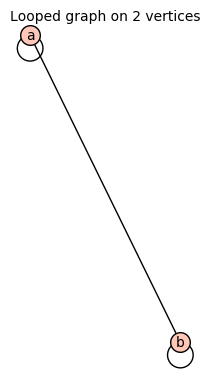

In [54]:
Graph([{'a','b'}, lambda u, v: True])

In [58]:
str(U(1,1))

'U(1a, 1b)'